In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


energyData = pd.read_csv("/Users/tanneramman/Downloads/energyDataLinear2021.csv")
energyData.head()

In [ ]:
energyData.columns

In [ ]:
energy = energyData.copy()
energy = energy.drop(columns = 'Unnamed: 0')
energy.head()

In [ ]:
energy.columns

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/3737740679.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


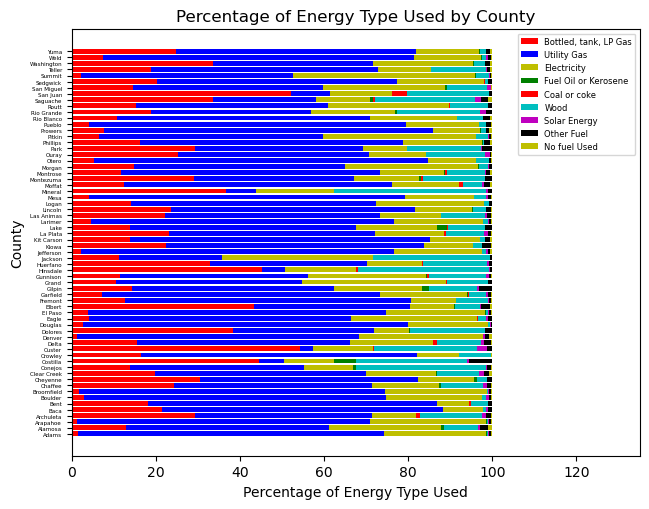

In [42]:
### Didn't use in final report, too difficult to read

countyGroup = energy.groupby(['County'], as_index = False).mean()

justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)


x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
#y9 = copy[]/copy['summed']*100                       

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='r')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')
#plt.bar(x, y9, bottom=y0+y1+y2+y3+y4+y5+y6+y7+y8, color='b')
plt.yticks(fontsize = 4)
plt.savefig("/Users/tanneramman/Downloads/EnergyBarStacked.png", bbox_inches='tight')
plt.xlim(0,135)
#plt.figure(figsize=(5,25))

plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("Percentage of Energy Type Used by County")
plt.show()


In [ ]:
countyGroup = energy.groupby(['County']).mean()
countyGroup.head()

In [ ]:
orgByPopLowest = countyGroup.sort_values(by = 'Census_Population')
orgByPopLowest = orgByPopLowest.reset_index()
orgByPopLowest.head()

In [ ]:
orgByPopHighest = countyGroup.sort_values(by = 'Census_Population', ascending = False)
orgByPopHighest = orgByPopHighest.reset_index()
orgByPopHighest.head()

In [ ]:
topTen = orgByPopHighest.head(10)
bottomTen = orgByPopLowest.head(10)

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/3209814991.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


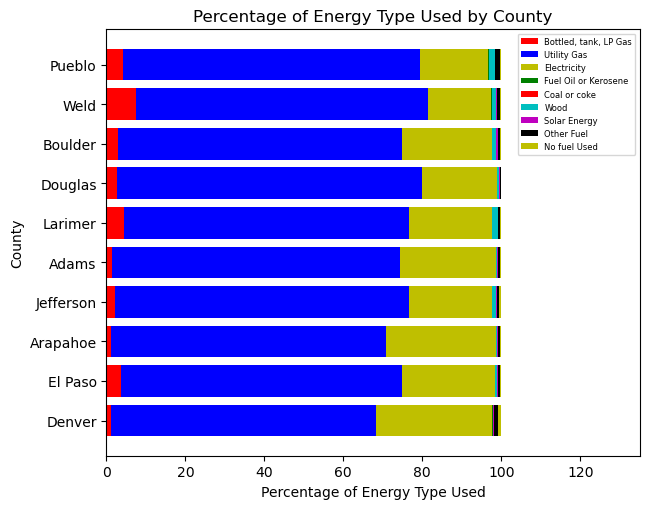

In [43]:
### Organized by top ten highest county population
### Didn't use in final report

justEnergy = topTen[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)


x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
#y9 = copy[]/copy['summed']*100                       

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='r')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')
#plt.bar(x, y9, bottom=y0+y1+y2+y3+y4+y5+y6+y7+y8, color='b')

plt.savefig("/Users/tanneramman/Downloads/EnergyBarStackedTopTen.png", bbox_inches='tight')
plt.xlim(0,135)
#plt.figure(figsize=(5,25))

plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("Percentage of Energy Type Used by County")
plt.show()

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/1323833667.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


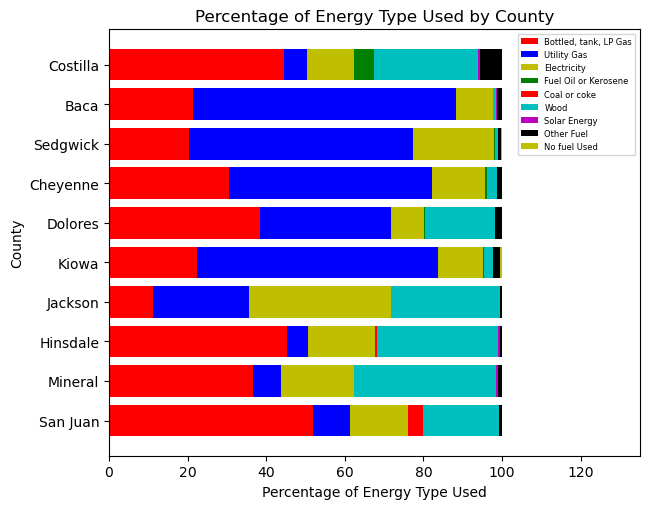

In [49]:
### Organized by ten lowest county population
### Didn't use in final report

justEnergy = bottomTen[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)
orgByPopHighest = countyGroup.sort_values(by = 'Census_Population', ascending = False)
orgByPopHighest = orgByPopHighest.reset_index()
orgByPopHighest.head()
orgByPopHighest.to_csv("/Users/tanneramman/Downloads/orgByPopHighest.csv")

x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
#y9 = copy[]/copy['summed']*100                       

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='r')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')
#plt.bar(x, y9, bottom=y0+y1+y2+y3+y4+y5+y6+y7+y8, color='b')

plt.savefig("/Users/tanneramman/Downloads/EnergyBarStackedBottomTen.png", bbox_inches='tight')
plt.xlim(0,135)
#plt.figure(figsize=(5,25))

plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("Percentage of Energy Type Used by County")
plt.show()

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/1100281133.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)
/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/1100281133.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


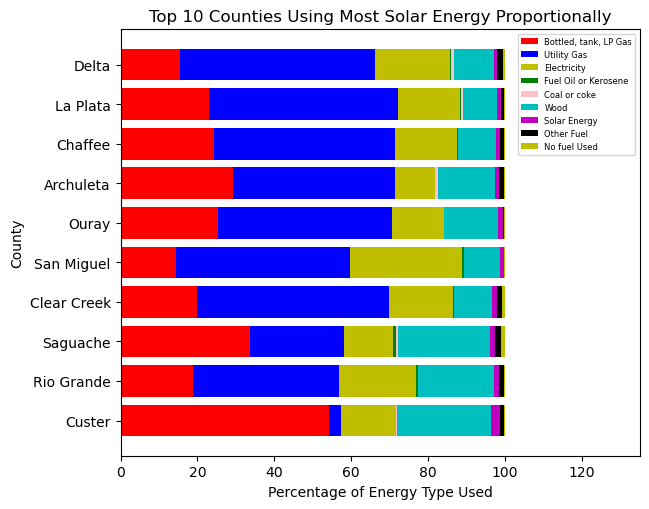

In [53]:
### Organized by most proportional solar energy usage in each county
### Top ten counties of highest percentages of solar energy usage shown
### Used in final report

justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)
copy['Total Usage (%)'] = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
orgBySolarUsageHighest = copy.sort_values(by = 'Total Usage (%)', ascending = False)
topTenSolar = orgBySolarUsageHighest.head(10)

solar = topTenSolar[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = solar.copy()
copy['summed'] = copy.sum(axis=1)

x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
                     

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='pink')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')



plt.xlim(0,135)


plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("Top 10 Counties Using Most Solar Energy Proportionally")
plt.savefig("/Users/tanneramman/Downloads/EnergyBarStackedTopTenSolarUsers.png", bbox_inches='tight')
plt.show()

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/270681446.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)
/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/270681446.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


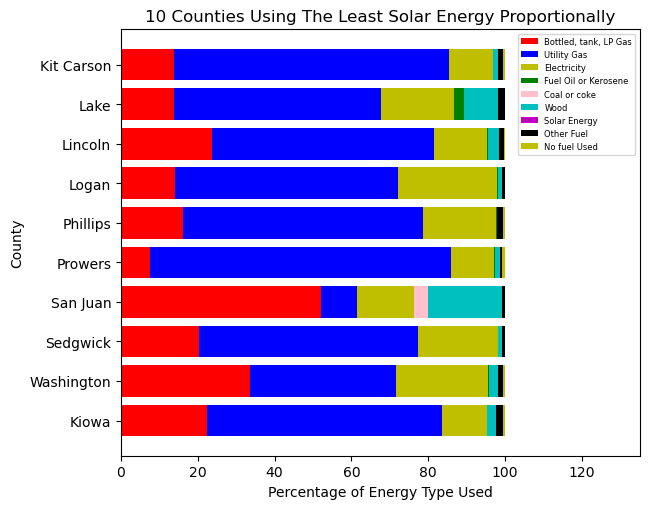

In [46]:
### Organized by least proportional solar energy usage in each county
### Ten counties of lowest percentages of solar energy usage shown
### Used in final report

justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)
copy['Total Usage (%)'] = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
orgBySolarUsageLowest = copy.sort_values(by = 'Total Usage (%)')
bottomTenSolar = orgBySolarUsageLowest.head(10)

solar = bottomTenSolar[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = solar.copy()
copy['summed'] = copy.sum(axis=1)

x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
#y9 = copy[]/copy['summed']*100                       

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='pink')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')



plt.xlim(0,135)


plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("10 Counties Using The Least Solar Energy Proportionally")
plt.savefig("/Users/tanneramman/Downloads/EnergyBarStackedBottomTenSolarUsers.png", bbox_inches='tight')
plt.show()

In [ ]:
countyGroup

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_35488/3606120793.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


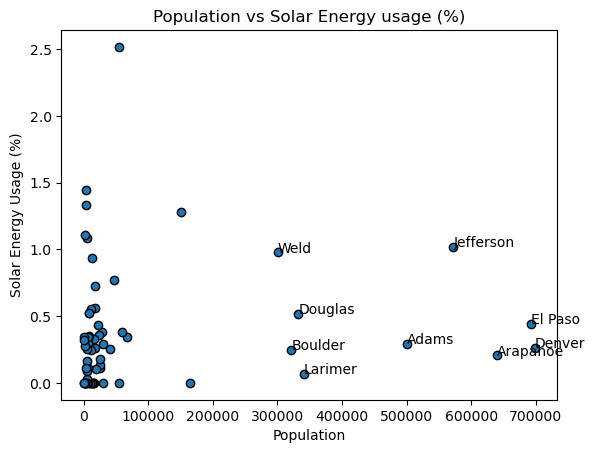

In [52]:
### Scatter plot of population vs proportional solar energy used by each county
### Wanted to showcase bottom right quadrant of graph as those showcase some of the best places for marketing residential solar panels
### Used in final report 

justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)

pop = orgByPopHighest['Census_Population']
solarEnergy = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
plt.scatter(pop, solarEnergy, edgecolor= 'black', linewidths= 1, marker = "o")


# Incorporate the other graph properties
plt.title(f'Population vs Solar Energy usage (%)')
plt.xlabel(f'Population')
plt.ylabel(f'Solar Energy Usage (%)')

plt.text(300396.5, 0.9782334043244414, 'Weld')
plt.text(321251.0, 0.2483498776729025, 'Boulder')
plt.text(332468.75, 0.5164878823996822, 'Douglas')
plt.text(341111.5, 0.06642679213949626, 'Larimer')
plt.text(698334.5, 0.2648030636419067, 'Denver')
plt.text(693113.0, 0.4400867229718798, 'El Paso')
plt.text(639455.75, 0.20676582811173191, 'Arapahoe')
plt.text(572012.25, 1.0207103168382365, 'Jefferson')
plt.text(499729.25, 0.2918577640121508, 'Adams')

plt.savefig("/Users/tanneramman/Downloads/populationBySolarUsage.png")

plt.show()